<a href="https://colab.research.google.com/github/VPREETHAMREDDY/23CSBTB39-40/blob/main/SML_AS_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-2c0aef54c420>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Patient_Status'] = label_encoder.fit_transform(data_cleaned['Patient_Status'])


SVM Accuracy: 0.7525773195876289
KNN Accuracy: 0.7010309278350515
Logistic Regression Accuracy: 0.7525773195876289


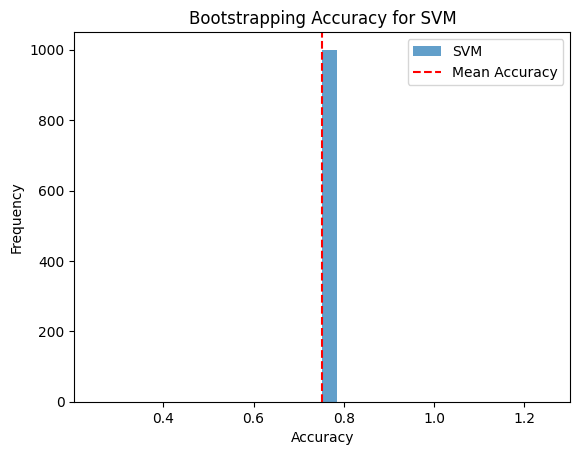

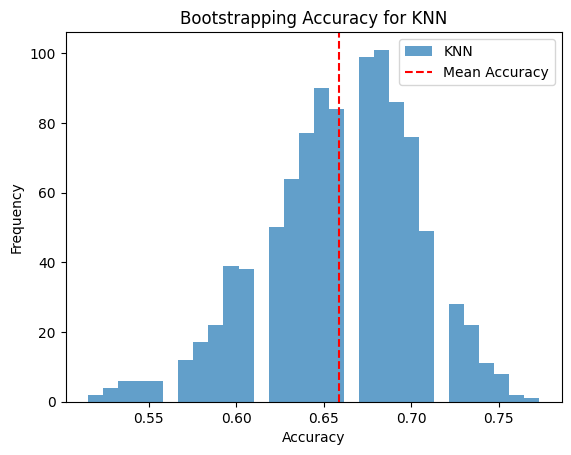

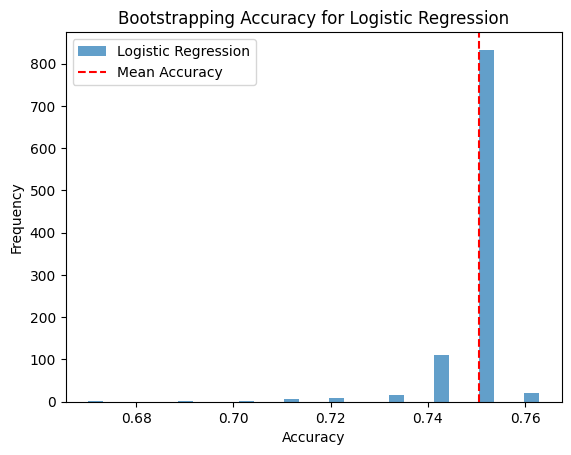

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('/content/breast_cancer_survival.csv')  # Replace with your file path

# Step 2: Clean and preprocess the data
data_cleaned = data.dropna(subset=['Patient_Status'])  # Drop rows with missing target values

# Encode target variable (Alive = 1, Dead = 0)
label_encoder = LabelEncoder()
data_cleaned['Patient_Status'] = label_encoder.fit_transform(data_cleaned['Patient_Status'])

# Select numerical features and target variable
features = data_cleaned[['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]
target = data_cleaned['Patient_Status']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Step 3: Train models and calculate accuracy
# Initialize models
svm_model = SVC(kernel='linear', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
logistic_model = LogisticRegression(random_state=42)

# Train models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# Predict and evaluate
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
logistic_preds = logistic_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
logistic_accuracy = accuracy_score(y_test, logistic_preds)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

# Step 4: Bootstrapping for accuracy visualization
def bootstrap_accuracy(model, X, y, n_iterations=1000):
    accuracies = []
    n_samples = len(X)
    for _ in range(n_iterations):
        indices = np.random.choice(range(n_samples), n_samples, replace=True)
        X_sample = X[indices]
        y_sample = y.iloc[indices]
        model.fit(X_sample, y_sample)
        preds = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, preds))
    return accuracies

# Bootstrapping plots
models = {'SVM': svm_model, 'KNN': knn_model, 'Logistic Regression': logistic_model}
for name, model in models.items():
    accuracies = bootstrap_accuracy(model, X_train, y_train)
    plt.hist(accuracies, bins=30, alpha=0.7, label=name)
    plt.axvline(x=np.mean(accuracies), color='red', linestyle='--', label='Mean Accuracy')

    plt.title(f"Bootstrapping Accuracy for {name}")
    plt.xlabel("Accuracy")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
